In [13]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

The following report determines the resonance frequencies, mode shapes, and quality factor for a Cantilever. Both the undamped/undriven and damped/driven cases are discussed. The first section follows the analytical calculations while the second displays the results from FEM simulations with COMSOL. The mode shapes for the undamped/undriven beam and amplitude response for the damped/driven beam are qualitatively similar for the analytical calculation and COMSOL simulation. The discrepencies between the two methods for the first four resonance frequencies are 0.3%, 0.3%, 0.2%, and 0.2%. The discrepency for the fundamental mode Quality factor is 95%.

#### Analytic Frequencies of Cantilever Modes:

#####Analysis following "Foundations of Nanomechanics" by Andrew Cleland

The Cantilever wave equation for a beam whose length is in the z direction is 

$$ E I_y \frac{\partial^4 U}{\partial z^4} = - \rho A \frac{\partial^2 U}{\partial t^2}$$

$E$ is Young's modulus for the material, $I_y$ is the polar moment of inertia for the y axis of the beam, $\rho$ is the material density, and $A$ is the beam cross sectional area

The Cantilever has boundary conditions

$$ U(0) = 0$$
$$ \frac{dU}{dz} = 0 $$
$$ \frac{d^2U}{dz^2} = 0$$
$$ \frac{d^3U}{dz^3} = 0$$ 

The boundary conditions constrain the frequencies determined by the equation

$$\cos(\beta_n l) \cosh(\beta_n l) + 1 = 0 $$

which has solutions $ \beta_n l = 1.875, 4.694, 7.855, 10.996...$

The corresponding frequencies are

$$ f_n = \frac{\omega_n}{2\pi} = \frac{(\beta_nl)^2}{2 \pi l^2}\sqrt{\frac{E I}{\rho A}}$$



The experimental quantities below are for a Gallium Arsenide beam

In [26]:
BL = [1.8751,4.69409,7.8539, 10.996] #1/m
L = 4e-4 #m  Length
E = 8.59e10 #N/m^2  Young's Modulus
w = 2.4e-5 #m  Width
h = 1.2e-5 #m  Height
I = w*h**3/12.0 #m^4  Polar moment of inertia for the y axis of the beam
r = 5316.0 #kg/m^3  Density
A = w*h #m^2  Cross sectional Area
alpha = 5.7e-6 #1/K  Thermal-expansion coefficient
T_0 = 293.15 #K  Temperature
c_p = 550 #J/(kg*K) Heat capacity per unit mass
C_p = c_p*r #J/(m^3*K)  Heat capacity per unit volume at constant pressure
k = 33.0 # W/(m*K) Thermal conductivity
D = k/(r*c_p) #m^2/s  Diffusivity
M = r*A*L #kg  Mass
print D

1.12866817156e-05


In [15]:
print 'The mode frequencies are:'
for B_nL in BL:
    f_n = (B_nL**2/(2*np.pi*L**2))*np.sqrt(E*I/(r*A))
    print f_n, 'Hz'
    

The mode frequencies are:
48701.6567477 Hz
305209.250205 Hz
854408.582931 Hz
1674805.31375 Hz


The functional form for the displacement of mode n is

$$ U_n = a_n(\cos(\beta_n z) - \cosh(\beta_n z)) + b_n(\sin(\beta_n z) - \sinh(\beta_n z)) $$

with $a_n/b_n = -1.3622, -0.9819, -1.008, -1.000$

Plotting the mode shapes in arbitrary units

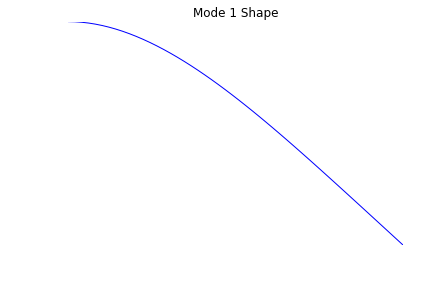

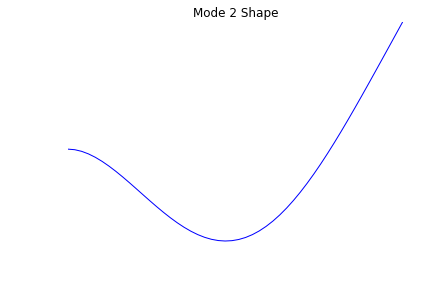

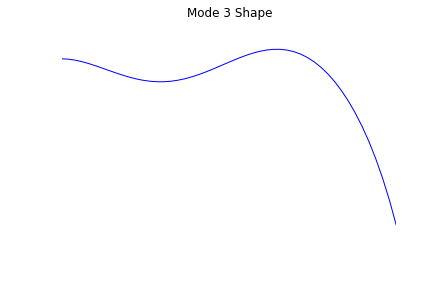

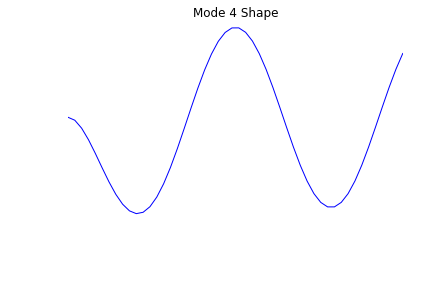

In [16]:
BL = [1.8751,4.69409,7.8539, 10.996] #1/m
a = [L, L, L ,L]
b = [L/-1.3622, L/-0.9819, L/-1.008, L/-1.000]
z = np.linspace(0,L)
for mode in range(1,5):
    B_nL = BL[mode-1]
    a_n = a[mode-1]
    b_n = b[mode-1]
    U_n = a_n*(np.cos(B_nL*z/L)-np.cosh(B_nL*z/L))+b_n*(np.sin(B_nL*z/L)-np.sinh(B_nL*z/L))
    plt.figure()
    plt.plot(z, U_n)
    plt.title('Mode {} Shape'.format(mode))
    plt.xlabel('Length')
    plt.ylabel('Height')
    plt.axis('off')
    plt.show()


####Driven Cantilever

If we have a uniformly distributed force per unit length $f(z,t) = f_0 e^{- i \omega t}$ directed along the x-axis, the beam wave equation is modified

$$ E I_y \frac{\partial^4 U}{\partial z^4} = - \rho A \frac{\partial^2 U}{\partial t^2} +  f_0 e^{-i \omega_c t}$$

The solution for the position dependent displacement for $\omega_c$ close to $\omega_1$,in the limit of small dissipation $Q^{-1}$, and for times long in comparison to the damping time for the beam so that $\omega_ct/Q \gg 1$ is

$$U(z,t) = \frac{\eta_1}{\omega_1^2-\omega_c^2-i\omega_1^2/Q} \frac{f_0}{M}U_1(z)e^{-i \omega_c t}$$

with

$$U_1(z) = a_1(\cos(\frac{\beta_1 L z}{L}) - \cosh(\frac{\beta_1 L z}{L})) + b_1(\sin(\frac{\beta_1 L z}{L}) - \sinh(\frac{\beta_1 L z}{L})) $$

After normalizing the eigenfunctions, $a_1 = L$ and $b_1 = L/ 1.01781$. $\beta_1 L = 1.8751$. 

$\eta_1$ is the first moment of the eigenfunction $U_1(z)$,

$$ \eta_1 = \frac{1}{L^2} \int_0^L U_1(z) dz = 0.8309$$

The thermoelastic dissipation $1/Q_t$ for a thin beam under transverse flexure is approximately given by 

$$ \frac{1}{Q_t} = \Delta_t \frac{\omega \tau_t}{1+\omega^2 \tau_t^2} $$

where 

$$ \Delta_t = \frac{E_{ad} - E}{E} = \frac{E \alpha^2 T_0}{C_p}$$



$E$ is the isothermal value of Young's modulus, $\alpha$ is the material's thermal-expansion coefficient, $C_p$ is the heat capacity per unit volume at constant pressure.

The characteristic time $\tau_t$ is given by

$$ \tau_t = \frac{h^2}{\pi^2 D} $$

$h$ is the beam thickness, and $D$ is the thermal diffusivity of the solid, $D = \kappa/c_v$ .

$M$ is the mass of the beam

$$M = \rho A L $$


We can calculate the amplitude of the beam's first mode as a function of drive frequency at z = L

In [55]:
x_1 = []
y_1 = []

for line in open('20150810_displacement_amplitude.txt'):
    if line[0] == '%':
        continue
    a = [x.strip() for x in line.split(" ")]
    a = filter(lambda a: a != '', a)
    x_1.append(float(a[0]))
    y_1.append(float(a[1]))

-0.0004
Q is 10976
Resonance frequency is 48701.6567477 Hz


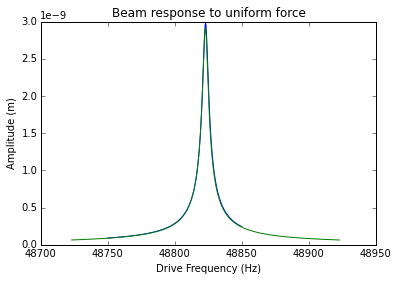

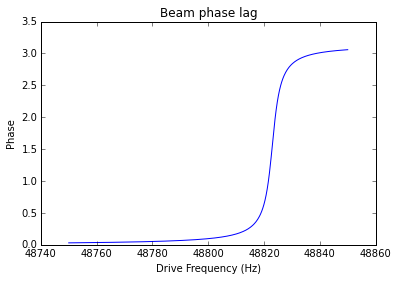

In [61]:
f_0 = 1e-4  #N/m Drive force
B_1L = 1.8751
w_1 = (B_1L**2/(L**2))*np.sqrt(E*I/(r*A)) 
f_1 = w_1/(2*np.pi) #Hz First resonance frequency
delta = E*(alpha**2)*T_0/C_p
tau = h**2/(np.pi**2*D) #s Characteristic time
f_c = np.linspace(4.875e4,4.885e4, num=500) #Hz Drive frequency
w_c = f_c*2*np.pi
a_1 = L
b_1 = L/(-1.3622)
n_1 = -0.7829#0.8309
z = L
U_1 = a_1*(np.cos(B_1L)-np.cosh(B_1L))+b_1*(np.sin(B_1L)-np.sinh(B_1L))
amp = []
phase = []
for freq in w_c:
    #Q = (1/delta)*((1+freq**2*tau**2)/(freq*tau))
    Q = 10976 #comsol value
    w_1 = 48823*2*np.pi #comsol value
    amp_1 = np.absolute(((n_1)/(w_1**2-freq**2-(1j*w_1**2)/Q))*(f_0/M)*U_1*2.5e-4)
    phase_1 = np.angle(((n_1)/(w_1**2-freq**2-1j*w_1**2/Q))*(f_0/M)*U_1)
    amp.append(amp_1)
    phase.append(phase_1)
plt.figure()
plt.plot(f_c,amp)
plt.plot(x_1, y_1)
plt.title('Beam response to uniform force')
plt.xlabel('Drive Frequency (Hz)')
plt.ylabel('Amplitude (m)')
#plt.xlim([4.878e4,4.880e4])
#plt.ylim([0,0.4e-9])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.figure()
plt.plot(f_c,phase)
plt.title('Beam phase lag')
plt.xlabel('Drive Frequency (Hz)')
plt.ylabel('Phase')


print 'Q is', Q
print 'Resonance frequency is', f_1, 'Hz'

In [58]:
w_1/Q

27.948611174601762

#### Comsol Simulation

We first solve for the undamped and undriven beam. The eigenfrequencies are displayed below

In [20]:
mode1 = mpimg.imread('20150805_cantilever_mode1.png')
mode2 = mpimg.imread('20150805_cantilever_mode2.png')
mode3 = mpimg.imread('20150805_cantilever_mode3.png')
mode4 = mpimg.imread('20150805_cantilever_mode4.png')

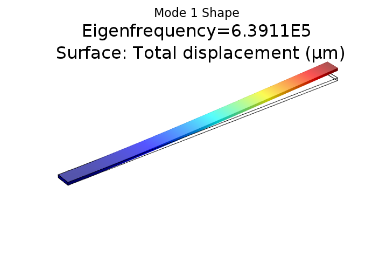

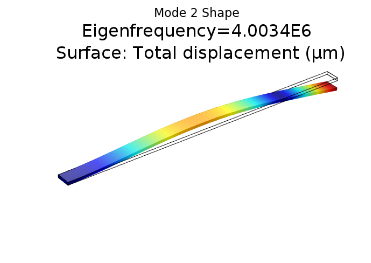

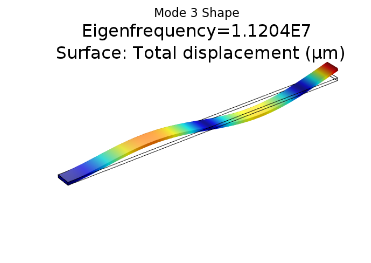

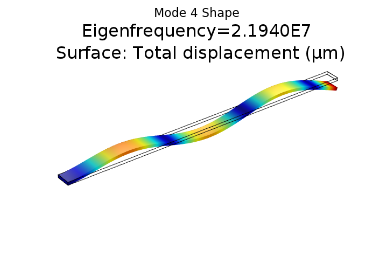

In [21]:

c_modes = [mode1, mode2, mode3, mode4]
mode = 1
for img in c_modes:
    plt.figure()
    plt.imshow(img)
    plt.title('Mode {} Shape'.format(mode))
    plt.axis('off')
    plt.show()
    mode += 1

The resonace frequency and quality factor for the damped fundamental mode are $6.3912 \times 10^5$ Hz and $1.005 \times 10^7$ respectively. 


In [22]:
disc_f1 = (639110.0-636912.0)*100/639120.0
disc_f2 = (4.003e6-3991480.80796)*100/4.003e6
disc_f3 = (1.120e7-11173827.3287)*100/1.120e7
disc_f4 = (2.194e7-21902852.7557)*100/2.194e7 

print 'The discrepencies for the first four resonance frequencies are', disc_f1,'%', disc_f2, '%', disc_f3, '%', disc_f4, '%'

disc_Q = np.absolute(1.005e7-13290188.0)*100/1.4194e7
print 'The discrepency for the fundamental mode Quality factor is', disc_Q, '%'

The discrepencies for the first four resonance frequencies are 0.343910376768 % 0.287763978016 % 0.233684565179 % 0.169312872835 %
The discrepency for the fundamental mode Quality factor is 22.8278709314 %


Driving the beam with a uniform force per area of $1000$ $N/m^2$ with thermoelastic damping and finding the amplitude

In [23]:
drive_response = mpimg.imread('20150728_cantilever_driven_antiresonance.png')

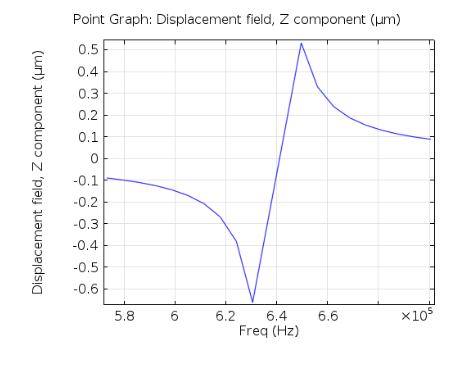

In [24]:
plt.figure(figsize=(8, 6))
plt.imshow(drive_response)
plt.axis('off')
plt.show()

We note that the simulation reproduces the antiresonance response in the analytical solution.